In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn import datasets,linear_model,neighbors,metrics,utils
import os
#from datetime import datetime,timezone
#import pytz

In [3]:
directories   = ['activity','audio','bluetooth','conversation','dark','gps','phonecharge','phonelock','wifi','wifi_location']

data = {}

for label in directories:
    dirname ="Inputs/sensing/"+label
    directory = os.fsencode(dirname)
    data[label] = {}
    for file in os.listdir(directory):
         filename = os.fsdecode(file)
         if filename.endswith(".csv"): 
            df = pd.read_csv(dirname+'/'+filename,index_col=False)
            data[label][filename.split("_")[1].split('.')[0]] = df

panas       = pd.read_csv("Outputs/panas.csv",index_col=0)
flourishing = pd.read_csv("Outputs/FlourishingScale.csv",index_col=0)

In [4]:
#panas.head() #missing excited, ashamed
flourishing_pre  = flourishing.loc[flourishing['type'] == 'pre'].drop('type',axis=1)
flourishing_post = flourishing.loc[flourishing['type'] == 'post'].drop('type',axis=1)

panas_pre  = panas.loc[panas['type'] == 'pre'].drop('type',axis=1)
panas_post = panas.loc[panas['type'] == 'post'].drop('type',axis=1)

In [5]:
#replace NaN with median value
panas_pre        = panas_pre.fillna(panas_pre.median()) # 46 rows
panas_post       = panas_post.fillna(panas_post.median()) # 39 rows
flourishing_pre  = flourishing_pre.fillna(flourishing_pre.median()) 
flourishing_post = flourishing_post.fillna(flourishing_post.median()) 

In [6]:
panas_idx = panas_pre.index.intersection(panas_post.index) # 38 common indexes
flourishing_idx = flourishing_pre.index.intersection(flourishing_post.index) # 37 common indexes

panas_pre           = panas_pre.loc[panas_idx]
panas_post          = panas_post.loc[panas_idx]
flourishing_pre     = flourishing_pre.loc[flourishing_idx]
flourishing_post    = flourishing_post.loc[flourishing_idx]

In [8]:
#PANAS
AVE_POS = 33.3
AVE_NEG = 17.4
PANAS_LEN = len(panas_idx)
#positive pre & post
pre_pos  = panas_pre[['Interested','Strong','Enthusiastic','Proud','Alert','Inspired','Determined ','Attentive','Active ']].sum(axis=1)
pre_pos = np.where(pre_pos > AVE_POS, 'high', 'low') 
post_pos = panas_post[['Interested','Strong','Enthusiastic','Proud','Alert','Inspired','Determined ','Attentive','Active ']].sum(axis=1)
post_pos = np.where(post_pos > AVE_POS, 'high', 'low') 
#negative pre & post
pre_neg    = panas_pre[['Distressed','Upset','Guilty','Scared','Hostile ','Irritable','Nervous','Jittery','Afraid ']].sum(axis=1)
pre_neg    = np.where(pre_neg > AVE_NEG, 'high', 'low') 
post_neg   = panas_post[['Distressed','Upset','Guilty','Scared','Hostile ','Irritable','Nervous','Jittery','Afraid ']].sum(axis=1)
post_neg   = np.where(post_neg > AVE_NEG, 'high', 'low') 

y = pd.DataFrame(index=panas_idx)
y['pre_pos'] = pre_pos
y['post_pos'] = post_pos
y['pre_neg'] = pre_neg
y['post_neg'] = post_neg
#print(y)
#print(len(y))
# 大于平均值 = high

In [59]:
count = segment.groupby(' activity inference').count()
count.loc[0]['timestamp']

72

In [158]:
FIFTEEN_MIN = 15*60
#day = 24*60*60

#FIND FIRST AND LAST TIMESTAMP
minTime = data['activity']['u01']['timestamp'][0]
maxTime = data['activity']['u01']['timestamp'][len(data['activity']['u01']['timestamp'])-1]
for user in panas_idx:
    if data['activity'][user]['timestamp'][0] < minTime:
        minTime = data['activity'][user]['timestamp'][0]
    if data['audio'][user]['timestamp'][len(data['audio'][user]['timestamp'])-1] > maxTime:
        maxTime = data['audio'][user]['timestamp'][len(data['audio'][user]['timestamp'])-1]

In [223]:
##TAKES LONG TIME TO RUN
##TAKES LONG TIME TO RUN
##TAKES LONG TIME TO RUN
##TAKES LONG TIME TO RUN

timeCount = minTime
timeLog = pd.DataFrame(index=panas_idx)
user_time_iterator = dict.fromkeys(data['activity'].keys(), 0)
prev_time = 0

while timeCount < maxTime:
    timeLog[timeCount] = [-1]*len(panas_idx)
    user = 'u02'
    #
    #for user in panas_idx:
    ###
    maxTimestampIndex = len(data['activity'][user]['timestamp'])-1
    i = user_time_iterator[user]
    if i > maxTimestampIndex:
        break
    i = i+350 #skip some values
    if i > maxTimestampIndex:
        i = user_time_iterator[user]
    next_time = timeCount+FIFTEEN_MIN

    while data['activity'][user]['timestamp'][i] < next_time and i < maxTimestampIndex:
        i = i+1
    segment = data['activity'][user][user_time_iterator[user]:i]
    if segment.empty:
        break
    total = len(segment)
    count = segment.groupby(' activity inference').count()
    #print(count)
    if 0 in count.index:
        if count.loc[0]['timestamp']/total > 0.6: #if more than half stationary, not active 
            #print("more than half")
            timeLog.at[user,timeCount] = 0
        elif 3 in count.index and (count.loc[0]['timestamp']+count.loc[3]['timestamp'])/total > 0.7:
            #print("unknown")
            timeLog.at[user,timeCount] = 0
        else:
            #print("active")
            timeLog.at[user,timeCount] = 1
    else: #if no stationary, consider as active
        #print("active")
        timeLog.at[user,timeCount]  = 1
    user_time_iterator[user] = i
    ###
    timeCount = next_time
print(timeLog)

     1364356800  1364357700  1364358600  1364359500  1364360400  1364361300  \
uid                                                                           
u00          -1          -1          -1          -1          -1          -1   
u01          -1          -1          -1          -1          -1          -1   
u02           0           0           0           0           0           0   
u03          -1          -1          -1          -1          -1          -1   
u04          -1          -1          -1          -1          -1          -1   
u05          -1          -1          -1          -1          -1          -1   
u07          -1          -1          -1          -1          -1          -1   
u09          -1          -1          -1          -1          -1          -1   
u10          -1          -1          -1          -1          -1          -1   
u14          -1          -1          -1          -1          -1          -1   
u15          -1          -1          -1          -1 

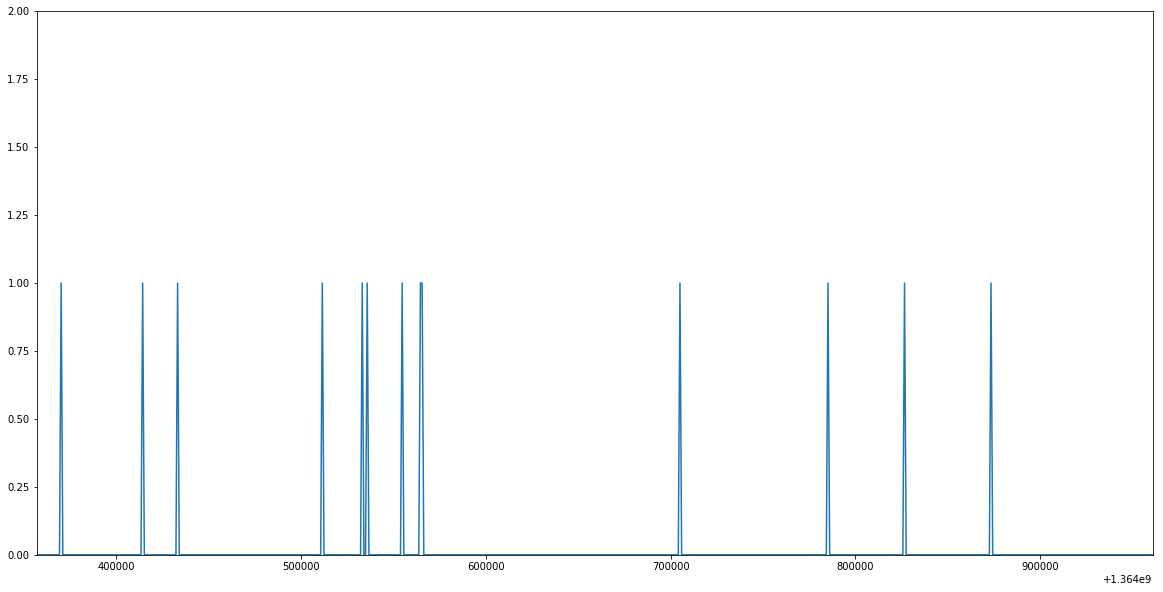

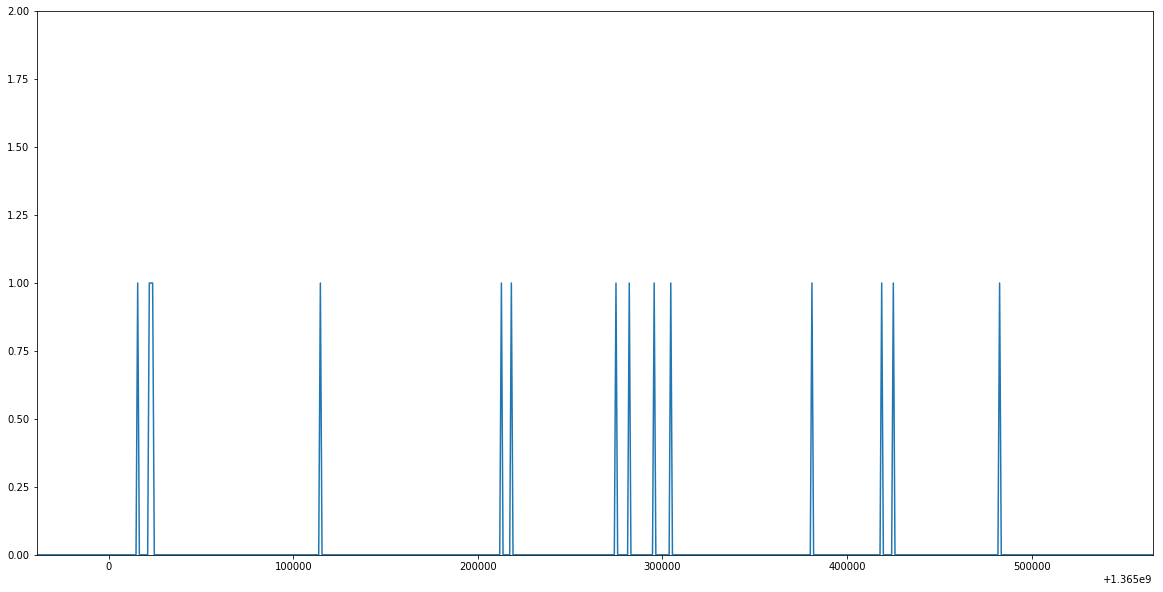

In [224]:
#print(timeLog.loc['u03'].value_counts())
WEEK = 7*24*60*60
fig = plt.figure(figsize=(20,10))
ax2 = fig.add_subplot(111)
ax2.set_xlim([1364357000,1364356000+WEEK])
ax2.set_ylim([0,2])
#for user in panas_idx:
ax2.plot(timeLog.columns,timeLog.loc['u02'])

fig = plt.figure(figsize=(20,10))
ax3 = fig.add_subplot(111)
ax3.set_xlim([1364356000+WEEK,1364356000+WEEK+WEEK])
ax3.set_ylim([0,2])
#for user in panas_idx:
ax3.plot(timeLog.columns,timeLog.loc['u02'])


In [161]:
#est  = 'US/Eastern'
#aest = 'Australia/Sydney'
#print(data['audio']['u01']['timestamp'][0])
#timestamp = datetime.fromtimestamp(data['audio']['u01']['timestamp'][0])
#print(timestamp)
#print(pytz.timezone(aest).localize(timestamp).astimezone(pytz.timezone(est))) #EST

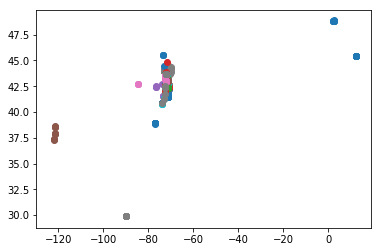

In [143]:
## general scatter plot of location data
fig = plt.figure()
ax1 = fig.add_subplot(111)
for user in panas_idx:
    ax1.scatter(data['gps'][user][data['gps'][user]['provider']=='gps']['longitude'],data['gps'][user][data['gps'][user]['provider']=='gps']['latitude'])

In [142]:
#print(newitem.reset_index())
distanceInfo = pd.DataFrame( columns=['total_distance','variance_long','variance_lat'],index=panas_idx)

for user in panas_idx:
    totalDist = 0
    var_long  = 0
    var_lat   = 0
    gpsProvider = data['gps'][user][ data['gps'][user]['provider'] == 'gps'].reset_index()
    prev_long = gpsProvider['longitude'][0]
    prev_lat  = gpsProvider['latitude'][0]
    mean_long = gpsProvider['longitude'].mean()
    mean_lat  = gpsProvider['latitude'].mean()
    
    for i in range(1,len(gpsProvider)):
        longitude = gpsProvider.loc[i]['longitude']
        latitude  = gpsProvider.loc[i]['latitude']
        var_long  = var_long + (longitude-mean_long)*(longitude-mean_long)
        var_lat   = var_lat  + (latitude - mean_lat)*(latitude - mean_lat)
        totalDist = totalDist + math.sqrt( (longitude-prev_long)*(longitude-prev_long) + (latitude-prev_lat)*(latitude-prev_lat))
        prev_long = longitude
        prev_lat  = latitude
    distanceInfo.at[user,'total_distance'] = totalDist
    distanceInfo.at[user,'variance_long'] = var_long/len(gpsProvider)
    distanceInfo.at[user,'variance_lat'] = var_lat/len(gpsProvider)
print(distanceInfo)

    total_distance variance_long variance_lat
uid                                          
u00        199.852       538.207      2.56981
u01       0.999334   1.66114e-05  7.69193e-05
u02        2.09003   0.000424847   0.00129598
u03       0.523636   3.75658e-05  0.000164154
u04        22.2945      0.783075     0.382624
u05        3.36038     0.0246078    0.0248407
u07         25.153       3.98273    0.0272609
u09        8.01062     0.0704198    0.0276078
u10      0.0629815   1.16351e-06  2.12789e-06
u14        3.83459      0.243644     0.329019
u15        12.5733      0.825185      1.64372
u16       0.717587   1.66893e-05  0.000395338
u17       0.121948   3.38292e-06   2.1497e-06
u18        4.01938     0.0456537    0.0482632
u19        2.58668    0.00467481   0.00274079
u20       0.197588   2.03933e-06  6.15455e-07
u23       0.362974   4.86699e-07  2.12998e-07
u24       0.142347   5.18793e-05  8.42356e-05
u27      0.0395907   1.43509e-06  8.85049e-07
u30        27.5261      0.169213  

In [227]:
X = {}
for sensor in data.keys():
    X[sensor] = pd.DataFrame(index=panas_idx)
    if sensor == 'activity':
        X[sensor][0] = [0.0]*PANAS_LEN
        X[sensor][1] = [0.0]*PANAS_LEN
        X[sensor][2] = [0.0]*PANAS_LEN
        #X[sensor][3] = [0.0]*PANAS_LEN
#print(X['activity'])
# activity
X['gps']['total_distance'] = distanceInfo['total_distance']
X['gps']['variance_long'] = distanceInfo['variance_long']
X['gps']['variance_lat'] = distanceInfo['variance_lat']
for u in (panas_idx):
    total = len(data['activity'][u]['timestamp'])
    X['activity'].loc[u][0] = data['activity'][u].groupby(' activity inference').count().loc[0]/total
    X['activity'].loc[u][1] = data['activity'][u].groupby(' activity inference').count().loc[1]/total
    X['activity'].loc[u][2] = data['activity'][u].groupby(' activity inference').count().loc[2]/total
    #X['activity'].loc[u][3] = data['activity'][u].groupby(' activity inference').count().loc[3]/total



In [241]:
Xsubset = X['activity']
Xsubset['variance_lat'] = distanceInfo['variance_lat']
Xsubset['total_distance'] = distanceInfo['total_distance']
Xsubset['variance_long'] = distanceInfo['variance_long']
#print(Xsubset)

In [263]:
# shuffle?
#print(utils.shuffle(X['activity']))
shuffled = utils.shuffle(Xsubset)
# split train/test
X_train = shuffled.iloc[:27,:]
X_test = shuffled.iloc[27:,:]
y_train = y.loc[X_train.index]
y_test = y.loc[X_test.index]
#print(len(X_train))
#print(y_train)

27
['high' 'high' 'high' 'low' 'high' 'high' 'high' 'low' 'high' 'high'
 'high']
['high', 'high', 'high', 'low', 'low', 'low', 'high', 'low', 'high', 'high', 'high']
0.8181818181818182
Optimal number of neighbours is for test is 
9
0.9642857142857143


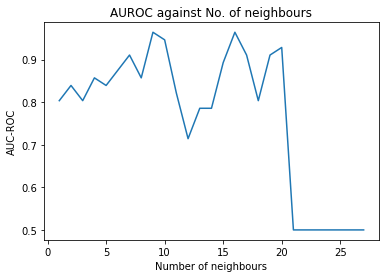

In [264]:
nbrs = neighbors.KNeighborsClassifier(n_neighbors=2)

nbrs.fit(X_train,y_train['post_neg'])
y_pred = nbrs.predict(X_test)
#print(list(y_test['post_pos']))
print(len(y_train))
print(y_pred)
print(list(y_test['post_neg']))
print(metrics.accuracy_score(list(y_test['post_neg']),y_pred))

roc_test = []
for i in range(1,28):
    nbrs = neighbors.KNeighborsClassifier(n_neighbors=i)
    nbrs.fit(X_train,y_train['post_neg'])
    #print(nbrs.predict(X_test))
    test_prob= nbrs.predict_proba(X_test) # "Classes are ordered by lexicographic order" ==> (high,low)?
    y_test_labels = np.where(y_test['post_neg'] == 'low', 1, 0)
    roc_test.append(metrics.roc_auc_score(y_test_labels,test_prob[:,1]))

plt.figure()
plt.title("AUROC against No. of neighbours")
plt.xlabel("Number of neighbours")
plt.ylabel("AUC-ROC")
plt.plot(range(1,28),roc_test)
print("Optimal number of neighbours is for test is ")
print(roc_test.index(max(roc_test))+1) #index starts from 0
print(max(roc_test))